## Import/ Install Libraries

In [ ]:
# %%capture
# import os
# if "COLAB_" not in "".join(os.environ.keys()):
#     !pip install unsloth
# else:
#     # Do this only in Colab and Kaggle notebooks! Otherwise use pip install unsloth
#     !pip install --no-deps bitsandbytes accelerate xformers==0.0.29 peft trl triton
#     !pip install --no-deps cut_cross_entropy unsloth_zoo
#     !pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
#     !pip install --no-deps unsloth

In [ ]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.6/191.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

In [ ]:
from unsloth import FastLanguageModel

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
!pip install datasets rouge_score langchain langchain_community ragas sqlglot openai streamlit

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.3 MB/s eta 0:00:00
  Created wheel for

## Imports

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import torch
from datasets import load_dataset
from trl import SFTTrainer
from transformers import TrainingArguments, AutoTokenizer, AutoModelForCausalLM
from unsloth import is_bfloat16_supported

import json
import os
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu
import numpy as np

from ragas.metrics import LLMSQLEquivalence
from ragas.dataset_schema import SingleTurnSample
import openai
import sqlglot
import re



import asyncio



In [ ]:
import os
os.environ["OPENAI_API_KEY"] ="your_openai_key"

In [ ]:
from ragas.llms import llm_factory
openai_model = llm_factory(model="gpt-4o")


## Unsloth class to handle model config and training

In [ ]:
class Unsloth():
  def __init__(self, model_name):


    self.model_name = model_name
    self.max_seq_length = 2048
    self.dtype = None
    self.load_in_4bit = True

    self.fourbit_models = [
    "unsloth/mistral-7b-v0.3-bnb-4bit",  # New Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/llama-3-8b-bnb-4bit",  # Llama-3 15 trillion tokens model 2x faster!
    "unsloth/llama-3-8b-Instruct-bnb-4bit",
    "unsloth/llama-3-70b-bnb-4bit",
    "unsloth/Phi-3-mini-4k-instruct",  # Phi-3 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/mistral-7b-bnb-4bit",
    "unsloth/gemma-7b-bnb-4bit",  # Gemma 2.2x faster!
    ]

    # self.model_name = model_name



    self.model, self.tokenizer = FastLanguageModel.from_pretrained(
    # model_name="unsloth/llama-3-8b-bnb-4bit",
    model_name = self.model_name,
    max_seq_length=self.max_seq_length,
    dtype=self.dtype,
    load_in_4bit=self.load_in_4bit,
    # token =""
      )
    self.model = FastLanguageModel.get_peft_model(
    self.model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

  def model_trainer(self,dataset):
    trainer = SFTTrainer(
    model = self.model,
    tokenizer = self.tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = self.max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.

    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",

    ),)

    trainer.train()


  def predict_sample(self, prompt,model, tokenizer):

    FastLanguageModel.for_inference(model)

    inputs  = tokenizer(prompt, return_tensors = "pt").to("cuda")

    outputs = model.generate(**inputs, max_new_tokens = 200, use_cache = True)

    results = tokenizer.batch_decode(outputs)

    return results

  def save_model(self, path):
    self.model.save_pretrained(path)  # Local saving
    self.tokenizer.save_pretrained(path)

  def load_model(self,path):

    model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = path, # YOUR MODEL YOU USED FOR TRAINING
    max_seq_length = self.max_seq_length,
    dtype = self.dtype,
    load_in_4bit = self.load_in_4bit,
    )

    return model, tokenizer








## Dataset Handling

In [ ]:
class Dataset():

  def __init__(self,dataset_name,tokenizer):
    self.prompt_template ="""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      {}

      ### Input:
      {}

      ### Response:
      {}"""
    self.EOS_TOKEN = tokenizer.eos_token

    self.dataset = load_dataset(dataset_name, split="train")
    self.dataset_name = dataset_name


  def prepare_data(self, examples):
    instructions = []
    inputs = []
    outputs = []


    # Map your dataset fields to Alpaca template fields
    for sql_context, sql_prompt, sql in zip(examples["sql_context"], examples["sql_prompt"], examples["sql"]):
        instruction = "Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax."
        input = f"[SCHEMA] {sql_context}\n[QUESTION] {sql_prompt}"
        output = sql

        instructions.append(instruction)
        inputs.append(input)
        outputs.append(output)

    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = self.prompt_template.format(instruction, input, output) + self.EOS_TOKEN
        texts.append(text)


    return { "text" : texts, }

  def load_data(self):
    print("Loading Data.....")
    dataset = self.dataset.map(self.prepare_data, batched=True)
    print("Data Loaded!")
    return dataset

  def val_data(self):

    val_data = load_dataset("gretelai/synthetic_text_to_sql", split="test")
    val_data = val_data.map(self.prepare_data, batched=True)
    return val_data


  def prompt_for_prediction(self, val_dataset,idx):
    example = val_dataset[idx]
    input_prompt = example['text'].split("### Response")[0]
    gt = example['text'].split("### Response")[1]
    return input_prompt,gt






## Rouge Eval

In [ ]:
# class Evaluator:
#   def __init__(self, model, tokenizer, val_dataset, output_dir='eval_results', sample_size=None):
#     self.model = model
#     self.tokenizer = tokenizer
#     self.val_dataset = val_dataset
#     self.output_dir = output_dir

#     self.scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)

#     self.sample_size = sample_size if sample_size is not None else self.val_dataset.shape[0]


#     os.makedirs(self.output_dir, exist_ok=True)


#   def generate_predictions(self):
#     predictions = []
#     references = []
#     count = 1

#     for i in range(self.sample_size):
#       print(count)
#       count+=1

#       example = self.val_dataset[i]
#       input_prompt = example['text'].split("### Response")[0]
#       gt = example['text'].split("### Response")[1]


#       # Generate prediction
#       inputs = self.tokenizer(input_prompt, return_tensors="pt").to("cuda")
#       outputs = self.model.generate(**inputs, max_new_tokens=200, use_cache=True)
#       prediction = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

#       print(f"Prediction: {prediction}")
#       print(f"GT: {gt}")

#       predictions.append(prediction)
#       references.append(gt)

#     return predictions, references


#   # def compute_rouge(self, predictions, references):
#   #   rouge1_scores = []
#   #   rouge2_scores = []
#   #   rougeL_scores = []

#   #   for pred, ref in zip(predictions, references):
#   #     scores = self.scorer.score(ref, pred)
#   #     rouge1_scores.append(scores['rouge1'].fmeasure)
#   #     rouge2_scores.append(scores['rouge2'].fmeasure)
#   #     rougeL_scores.append(scores['rougeL'].fmeasure)

#   #   return {
#   #       'rouge1': np.mean(rouge1_scores),
#   #       'rouge2': np.mean(rouge2_scores),
#   #       'rougeL': np.mean(rougeL_scores)
#   #   }

#   # def compute_bleu(self, predictions, references):
#   #   bleu_scores = []

#   #   for pred, ref in zip(predictions, references):
#   #     pred_tokens = pred.split()
#   #     ref_tokens = ref.split()
#   #     bleu_score = sentence_bleu([ref_tokens], pred_tokens)
#   #     bleu_scores.append(bleu_score)

#   #   return np.mean(bleu_scores)

#   def save_predictions(self, predictions, references, file_name = 'predictions.json'):
#     "Saving references to a JSON file"
#     output_path = os.path.join(self.output_dir, file_name)
#     data = {
#         "predictions": predictions,
#         "references": references
#     }
#     with open(output_path, 'w') as f:
#       json.dump(data, f, indent = 4)

#     print(f"Predictions saved to {output_path}")

#   def save_results(self, results, file_name = 'eval_results.json'):

#     output_path = os.path.join(self.output_dir, file_name)
#     with open(output_path, 'w') as f:
#       json.dump(results, f, indent = 4)
#     print(f"Evaluation results saved to {output_path}")

#   def evaluate(self):
#     print("Generating Predictions.....")
#     predictions, references = self.generate_predictions()

#     # save predictions locally
#     self.save_predictions(predictions, references)

#     # print("Computing ROUGE scores..")
#     # rouge_scores = self.compute_rouge(predictions, references)

#     # print("Computing BLEU scores..")
#     # bleu_score = self.compute_bleu(predictions, references)

#     # results = {
#     #     'rouge_scores': rouge_scores,
#     #     'bleu_score': bleu_score
#     # }

#     self.save_results(results)

#     return results

## RAGAS Evaluation

In [ ]:
def preprocess_prediction(query):
  """
  Preprocessing SQL query to remove extra characters and non-SQL text
  """
  if "### Response" in query:
    query = query.split("### Response")[1]
    # Handle the case where "### Response" is not found by returning the original query
  else:
    query = query

  query = query.replace(":\n","")
  query = query[:-1]
  query = query.strip()

  return query

def preprocess_reference(k):
  k = k.split("<|end_of_text|>")[0]

  k = k.replace(":\n","")
  k = k[:-1]
  k = k.strip()

  return k



In [ ]:


class Evaluator:
    def __init__(self, model, tokenizer, val_dataset, output_dir='/content/drive/MyDrive/Midterm-Project/eval_results', sample_size=None):
        self.model = model
        self.tokenizer = tokenizer
        self.val_dataset = val_dataset
        self.output_dir = output_dir
        self.sample_size = sample_size if sample_size is not None else len(val_dataset)

        # Initialize RAGAS SQL Equivalence Scorer
        self.scorer = LLMSQLEquivalence()
        self.scorer.llm = openai_model  # Replace with your OpenAI model instance

        # Create output directory if it doesn't exist
        os.makedirs(self.output_dir, exist_ok=True)

    def generate_predictions(self):
        predictions = []
        references = []
        schemas = []  # Store schemas for each sample
        count = 1

        for i in range(self.sample_size):
            print(f"Processing sample {count}")
            count += 1

            example = self.val_dataset[i]
            input_prompt = example['text'].split("### Response")[0]
            gt = example['text'].split("### Response")[1]
            schema = example['schema']  # Extract schema from the dataset

            # Generate prediction
            inputs = self.tokenizer(input_prompt, return_tensors="pt").to("cuda")
            outputs = self.model.generate(**inputs, max_new_tokens=200, use_cache=True)
            prediction = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

            print(f"Prediction: {prediction}")
            print(f"GT: {gt}")
            print(f"Schema: {schema}")

            predictions.append(prediction)
            references.append(gt)
            schemas.append(schema)

        return predictions, references, schemas

    async def compute_semantic_equivalence(self, predictions, references, schemas):
        """Compute SQL query semantic equivalence using RAGAS LLMSQLEquivalence."""
        semantic_equivalence_scores = []

        for pred, ref, schema in zip(predictions, references, schemas):
            # Create a SingleTurnSample for RAGAS
            sample = SingleTurnSample(
                response=pred,
                reference=ref,
                reference_contexts=[schema]  # Use the schema from the dataset
            )

            # Compute semantic equivalence score
            score = await self.scorer.single_turn_ascore(sample)
            semantic_equivalence_scores.append(score)

        return np.mean(semantic_equivalence_scores)

    def save_predictions(self, predictions, references, schemas, file_name='predictions.json'):
        """Save predictions, references, and schemas to a JSON file."""
        output_path = os.path.join(self.output_dir, file_name)
        data = {
            "predictions": predictions,
            "references": references,
            "schemas": schemas,
        }
        with open(output_path, 'w') as f:
            json.dump(data, f, indent=4)
        print(f"Predictions saved to {output_path}")

    def save_results(self, results, file_name='eval_results.json'):
        """Save evaluation results to a JSON file."""
        output_path = os.path.join(self.output_dir, file_name)
        with open(output_path, 'w') as f:
            json.dump(results, f, indent=4)
        print(f"Evaluation results saved to {output_path}")

    async def evaluate(self):
        print("Generating predictions...")
        predictions, references, schemas = self.generate_predictions()

        # Save predictions locally
        self.save_predictions(predictions, references, schemas)

        print("Computing SQL Query Semantic Equivalence using RAGAS...")
        semantic_equivalence_score = await self.compute_semantic_equivalence(predictions, references, schemas)

        # Combine results
        results = {
            'semantic_equivalence_score': semantic_equivalence_score,
        }

        # Save results locally
        self.save_results(results)

        return results
        self.val_dataset = val_dataset
        self.output_dir = output_dir
        self.sample_size = sample_size if sample_size is not None else len(val_dataset)

        # Initialize RAGAS SQL Equivalence Scorer
        self.scorer = LLMSQLEquivalence()
        self.scorer.llm = openai_model  # Replace with your OpenAI model instance

        # Create output directory if it doesn't exist
        os.makedirs(self.output_dir, exist_ok=True)

    def generate_predictions(self):
        predictions = []
        references = []
        schemas = []  # Store schemas for each sample
        count = 1

        for i in range(self.sample_size):
            print(f"Processing sample {count}")
            count += 1

            example = self.val_dataset[i]
            input_prompt = example['text'].split("### Response")[0]
            gt = example['text'].split("### Response")[1]
            schema = example['sql_context']  # Extract schema from the dataset

            # Generate prediction
            inputs = self.tokenizer(input_prompt, return_tensors="pt").to("cuda")
            outputs = self.model.generate(**inputs, max_new_tokens=200, use_cache=True)
            prediction = self.tokenizer.decode(outputs[0], skip_special_tokens=True)

            print(f"Prediction: {prediction}")
            print(f"GT: {gt}")
            print(f"Schema: {schema}")

            predictions.append(prediction)
            references.append(gt)
            schemas.append(schema)

        return predictions, references, schemas

    async def compute_semantic_equivalence(self, predictions, references, schemas):
        """Compute SQL query semantic equivalence using RAGAS LLMSQLEquivalence."""
        semantic_equivalence_scores = []

        for pred, ref, schema in zip(predictions, references, schemas):
            # Create a SingleTurnSample for RAGAS
            sample = SingleTurnSample(
                response=pred,
                reference=ref,
                reference_contexts=[schema]  # Use the schema from the dataset
            )

            # Compute semantic equivalence score
            score = await self.scorer.single_turn_ascore(sample)
            semantic_equivalence_scores.append(score)

        return np.mean(semantic_equivalence_scores), semantic_equivalence_scores


    def compute_exact_match(self, predictions, references):

      exact_match_scores = []

      for pred, ref in zip(predictions, references):
        cleaned_pred = preprocess_prediction(pred)
        cleaned_ref = preprocess_reference(ref)
        print("Predicted Query:",cleaned_pred)
        print("Cleaned query",cleaned_ref)
        if cleaned_pred.strip() == cleaned_ref.strip():
          exact_match_scores.append(1)
        else:
          exact_match_scores.append(0)

      return np.mean(exact_match_scores), exact_match_scores

    def compute_syntax_correctness(self, predictions):
      syntax_correctness_scores = []

      for pred in predictions:
        try:
          # preprocess the sql query
          cleaned_pred = preprocess_prediction(pred)

          # parse the sql query
          sqlglot.parse(cleaned_pred)
          syntax_correctness_scores.append(1)
        except Exception as e:
          syntax_correctness_scores.append(0)

      return np.mean(syntax_correctness_scores), syntax_correctness_scores

    def save_predictions(self, predictions, references, schemas, file_name='predictions.json'):
        """Save predictions, references, and schemas to a JSON file."""
        output_path = os.path.join(self.output_dir, file_name)
        data = {
            "predictions": predictions,
            "references": references,
            "schemas": schemas,
        }
        with open(output_path, 'w') as f:
            json.dump(data, f, indent=4)
        print(f"Predictions saved to {output_path}")

    def save_results(self, results, file_name='eval_results.json'):
        """Save evaluation results to a JSON file."""
        output_path = os.path.join(self.output_dir, file_name)
        with open(output_path, 'w') as f:
            json.dump(results, f, indent=4)
        print(f"Evaluation results saved to {output_path}")

    async def evaluate(self):
        print("Generating predictions...")
        predictions, references, schemas = self.generate_predictions()

        # Save predictions locally
        self.save_predictions(predictions, references, schemas)

        print("Computing SQL Query Semantic Equivalence using RAGAS...")
        semantic_equivalence_score, semantic_equivalence_score_list = await self.compute_semantic_equivalence(predictions, references, schemas)

        print("Computing Exact Match Accuracy...")
        exact_match_score, exact_match_score_list = self.compute_exact_match(predictions, references)

        print("Computing Syntax Correctness...")
        syntax_correctness_score, syntax_correctness_score_list = self.compute_syntax_correctness(predictions)

        # Combine results
        results = {
            'semantic_equivalence_score': semantic_equivalence_score,
            'semantic_equivalence_score_list': semantic_equivalence_score_list,
            'exact_match_score': exact_match_score,
            'exact_match_score_list:': exact_match_score_list,
            'syntax_correctness_score': syntax_correctness_score,
            'syntax_correctness_score_list': syntax_correctness_score_list
        }
        # Save results locally
        self.save_results(results)

        return results

## Main pipeline

In [ ]:
unsloth = Unsloth(model_name="unsloth/mistral-7b-bnb-4bit")

==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Unsloth 2025.3.9 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
data = Dataset("gretelai/synthetic_text_to_sql",unsloth.tokenizer)

README.md:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

(…)nthetic_text_to_sql_train.snappy.parquet:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

(…)ynthetic_text_to_sql_test.snappy.parquet:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [ ]:
train_dataset = data.load_data()

Loading Data.....


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Data Loaded!


In [ ]:
unsloth.model_trainer(train_dataset)

Tokenizing to ["text"] (num_proc=2):   0%|          | 0/100000 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100,000 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/3,794,014,208 (1.11% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: xaviers3601 (xaviers3601-northeastern-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,1.276400
2,1.276700
3,1.144300
4,0.948500
5,0.788400
6,0.619800
7,0.514000
8,0.430900
9,0.431200
10,0.484400


## Fine-tuning Pipeline

In [ ]:
BASE_MODEL_1 = "mistralai/Mistral-7B-v0.1"
BASE_MODEL_2 = "unsloth/llama-3-8b-bnb-4bit"
BASE_MODEL_1_PATH = "/content/drive/MyDrive/Tanmay-models/mistral-7b-base"
BASE_MODEL_2_PATH = "/content/drive/MyDrive/Tanmay-models/llama-3-8b-base"
FINE_TUNED_PATH_1 = "/content/drive/MyDrive/Tanmay-models/mistral-7b-fine-tuned"
FINE_TUNED_PATH_2 = "/content/drive/MyDrive/Tanmay-models/llama-3-8b-fine-tuned"


EVAL_RESULTS_DIR = "/content/drive/MyDrive/Tanmay-eval-results"

os.makedirs(os.path.join(EVAL_RESULTS_DIR, "base_model_1"), exist_ok=True)
os.makedirs(os.path.join(EVAL_RESULTS_DIR, "base_model_2"), exist_ok=True)
os.makedirs(os.path.join(EVAL_RESULTS_DIR, "fine_tuned_model_1"), exist_ok=True)
os.makedirs(os.path.join(EVAL_RESULTS_DIR, "fine_tuned_model_2"), exist_ok=True)



os.makedirs(BASE_MODEL_1_PATH, exist_ok=True)
os.makedirs(BASE_MODEL_2_PATH, exist_ok=True)
os.makedirs(FINE_TUNED_PATH_1, exist_ok=True)
os.makedirs(FINE_TUNED_PATH_2, exist_ok=True)
os.makedirs(EVAL_RESULTS_DIR, exist_ok=True)



In [ ]:
def save_base_model(base_model_path, save_path):
  unsloth = Unsloth(model_name=base_model_path)
  unsloth.save_model(save_path)


def fine_tune_and_save(base_model_path, fine_tuned_path):
  unsloth = Unsloth(model_name=base_model_path)
  data = Dataset("gretelai/synthetic_text_to_sql",unsloth.tokenizer)
  train_dataset = data.load_data()
  unsloth.model_trainer(train_dataset)
  unsloth.save_model(fine_tuned_path)



def evaluate_model(model_path, eval_results_dir, model, tokenizer):
    # Ensure the evaluation results directory exists
    os.makedirs(eval_results_dir, exist_ok=True)

    # Load dataset
    data = Dataset("gretelai/synthetic_text_to_sql", tokenizer)
    validation_data = data.val_data()

    # Initialize evaluator
    evaluator = Evaluator(model, tokenizer, validation_data, eval_results_dir, sample_size=20)

    # Run evaluation
    results = evaluator.evaluate()

    # Save evaluation results
    eval_results_file = os.path.join(eval_results_dir, "results.json")
    with open(eval_results_file, "w") as f:
        json.dump(results, f, indent=4)
    print(f"Evaluation results saved to {eval_results_file}")



In [ ]:
# save base models

# save_base_model(BASE_MODEL_1, BASE_MODEL_1_PATH)
# save_base_model(BASE_MODEL_2, BASE_MODEL_2_PATH)

==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Unsloth 2025.3.9 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


==((====))==  Unsloth 2025.3.9: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

In [ ]:
# evaluate base model
# base1 = Unsloth(BASE_MODEL_1_PATH)
# base2 = Unsloth(BASE_MODEL_2_PATH)
# base_model_1, base_tokenizer_1 = base1.load_model(BASE_MODEL_1_PATH)
# base_model_2, base_tokenizer_2 = base2.load_model(BASE_MODEL_2_PATH)

==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Already have LoRA adapters! We shall skip this step.


==((====))==  Unsloth 2025.3.9: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Already have LoRA adapters! We shall skip this step.


==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
==((====))==  Unsloth 2025.3.9: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:

# evaluate_model(
#     BASE_MODEL_1_PATH,
#     os.path.join(EVAL_RESULTS_DIR, "base_model_1") ,
#     base_model_1, base_tokenizer_1
# )
# evaluate_model(
#     BASE_MODEL_2_PATH,
#     os.path.join(EVAL_RESULTS_DIR, "base_model_2"),
#     base_model_2, base_tokenizer_2
# )
data1 = Dataset("gretelai/synthetic_text_to_sql", base_tokenizer_1)
validation_data = data1.val_data()


<coroutine object Evaluator.evaluate at 0x7e3c73e865c0>


In [ ]:
evaluator = Evaluator(base_model_1, base_tokenizer_1, validation_data, output_dir=os.path.join(EVAL_RESULTS_DIR, "base_model_1"), sample_size=20)
results = await evaluator.evaluate()


Generating predictions...
Processing sample 1
Prediction: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.

      ### Input:
      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);
[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?

       ### Output:
       SELECT AVG(explainability_score) FROM creative_ai WHERE region

IndexError: list index out of range

In [ ]:
data2 = Dataset("gretelai/synthetic_text_to_sql", base_tokenizer_2)
validation_data = data2.val_data()

Map:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [ ]:
evaluator = Evaluator(base_model_2, base_tokenizer_2, validation_data, output_dir=os.path.join(EVAL_RESULTS_DIR, "base_model_2"), sample_size=20)
results = await evaluator.evaluate()


Generating predictions...
Processing sample 1
Prediction: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.

      ### Input:
      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);
[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?

       ### Output:
      SELECT AVG(explainability_score) FROM creative_ai WHERE region 

IndexError: list index out of range

In [ ]:
fine_tune_and_save(BASE_MODEL_1, FINE_TUNED_PATH_1)
fine_tune_and_save(BASE_MODEL_2, FINE_TUNED_PATH_2)

==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/155 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

Unsloth 2025.3.9 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


README.md:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

(…)nthetic_text_to_sql_train.snappy.parquet:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

(…)ynthetic_text_to_sql_test.snappy.parquet:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

Loading Data.....


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Data Loaded!


Tokenizing to ["text"] (num_proc=2):   0%|          | 0/100000 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100,000 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/3,794,014,208 (1.11% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: xaviers3601 (xaviers3601-northeastern-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,1.275500
2,1.276100
3,1.144000
4,0.944100
5,0.786200
6,0.618800
7,0.514700
8,0.431500
9,0.430900
10,0.483800


==((====))==  Unsloth 2025.3.9: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

Loading Data.....


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

Data Loaded!


Tokenizing to ["text"] (num_proc=2):   0%|          | 0/100000 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 100,000 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/4,582,543,360 (0.92% trained)


Step,Training Loss
1,1.755500
2,1.763100
3,1.701100
4,1.613600
5,1.430000
6,1.175600
7,1.026900
8,0.818800
9,0.720700
10,0.737900


In [ ]:
# evaluate fine tuned  model
# ft1 = Unsloth(BASE_MODEL_1_PATH)
# ft2 = Unsloth(BASE_MODEL_2_PATH)
ft_model_1, ft_tokenizer_1 = ft1.load_model(FINE_TUNED_PATH_1)
ft_model_2, ft_tokenizer_2 = ft2.load_model(FINE_TUNED_PATH_2)

==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
==((====))==  Unsloth 2025.3.9: Fast Llama patching. Transformers: 4.48.3.
   \\   /|    NVIDIA A100-SXM4-40GB. Num GPUs = 1. Max memory: 39.557 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.0. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:
data_ft1 = Dataset("gretelai/synthetic_text_to_sql", ft_tokenizer_1)
validation_data1 = data_ft1.val_data()

data_ft2 = Dataset("gretelai/synthetic_text_to_sql", ft_tokenizer_2)
validation_data2 = data_ft2.val_data()

Map:   0%|          | 0/5851 [00:00<?, ? examples/s]

Map:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [ ]:
evaluator1 = Evaluator(ft_model_1, ft_tokenizer_1, validation_data1, output_dir=os.path.join(EVAL_RESULTS_DIR, "fine_tuned_model_1"), sample_size=20)
results1 = await evaluator1.evaluate()

Generating predictions...
Processing sample 1
Prediction: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.

      ### Input:
      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);
[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?

       ### Response:
       SELECT AVG(explainability_score) FROM creative_ai WHERE regi

In [ ]:
eval_results_file = os.path.join(FINE_TUNED_PATH_1, "results.json")
with open(eval_results_file, "w") as f:
    json.dump(results1, f, indent=4)
print(f"Evaluation results saved to {eval_results_file}")


Evaluation results saved to /content/drive/MyDrive/Tanmay-models/mistral-7b-fine-tuned/results.json


In [ ]:
evaluator2 = Evaluator(ft_model_2, ft_tokenizer_2, validation_data2, output_dir=os.path.join(EVAL_RESULTS_DIR, "fine_tuned_model_2"), sample_size=20)
results2 = await evaluator2.evaluate()

Generating predictions...
Processing sample 1
Prediction: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.

      ### Input:
      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);
[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?

       ### Response:
       SELECT AVG(explainability_score) FROM creative_ai WHERE regi

CancelledError: 

## Saving the Model

In [ ]:
unsloth.save_model("/content/drive/MyDrive/Midterm-Project")

## Test on sample

In [ ]:
loaded_model, loaded_tokenizer = unsloth.load_model("/content/drive/MyDrive/Midterm-Project")

==((====))==  Unsloth 2025.3.9: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Will load /content/drive/MyDrive/Midterm-Project as a legacy tokenizer.


In [ ]:
validation_data = data.val_data()

In [ ]:
validation_data.to_csv("/content/drive/MyDrive/Tanmay-validation-data/validation_data.csv")

Creating CSV from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

10848372

In [ ]:
import pandas as pd

In [ ]:
vd = pd.read_csv("/content/drive/MyDrive/Tanmay-validation-data/validation_data.csv")


In [ ]:
vd.head()

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation,text
0,1,artificial intelligence,"AI data on algorithmic fairness, AI safety, ex...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average explainability score of cr...,"CREATE TABLE creative_ai (application_id INT, ...",SELECT AVG(explainability_score) FROM creative...,This SQL query calculates the average explaina...,"Below is an instruction that describes a task,..."
1,2,rural development,"Agricultural innovation metrics, rural infrast...",basic SQL,basic SQL with a simple select statement,data manipulation,"inserting, updating, or deleting records",Delete all records of rural infrastructure pro...,"CREATE TABLE rural_infrastructure (id INT, pro...",DELETE FROM rural_infrastructure WHERE country...,This SQL query deletes all records of rural in...,"Below is an instruction that describes a task,..."
2,3,aerospace,"Aircraft manufacturing data, satellite deploym...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",How many accidents have been recorded for Spac...,"CREATE TABLE Accidents (id INT, launch_provide...","SELECT launch_provider, COUNT(*) FROM Accident...",This query groups the Accidents table by the l...,"Below is an instruction that describes a task,..."
3,4,aquaculture,"Aquatic farming data, fish stock management, o...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the maximum quantity of seafood sold i...,"CREATE TABLE sales (id INT, location VARCHAR(2...",SELECT MAX(quantity) FROM sales;,Find the maximum quantity of seafood sold in a...,"Below is an instruction that describes a task,..."
4,5,entertainment industry,"Audience demographics, viewership trends, cont...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the total budget for movies released b...,"CREATE TABLE Movies_Release_Year (id INT, titl...",SELECT SUM(budget) FROM Movies_Release_Year WH...,This query calculates the total budget for mov...,"Below is an instruction that describes a task,..."


In [ ]:
vd['text'][0]

"Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n      ### Instruction:\n      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.\n\n      ### Input:\n      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);\n[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?\n\n      ### Response:\n      SELECT AVG(explainability_score) FROM creative_ai WHERE region IN ('Europe', 'North America');</s>"

In [ ]:
vd.columns

Index(['id', 'domain', 'domain_description', 'sql_complexity',
       'sql_complexity_description', 'sql_task_type',
       'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql',
       'sql_explanation', 'text'],
      dtype='object')

In [ ]:
validation_data.shape[0]

5851

In [ ]:
input_prompt, gt = data.prompt_for_prediction(validation_data,13)

In [ ]:
results = unsloth.predict_sample(input_prompt,loaded_model, loaded_tokenizer)

In [ ]:
print(results)

["<s>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n      ### Instruction:\n      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.\n\n      ### Input:\n      [SCHEMA] CREATE TABLE patrols (id INT, district_id INT, date DATE, type TEXT); INSERT INTO patrols (id, district_id, date, type) VALUES (1, 1, '2021-01-01', 'Patrol'), (2, 1, '2021-01-02', 'Community'), (3, 2, '2021-01-01', 'Patrol'), (4, 2, '2021-01-03', 'Community'), (5, 3, '2021-01-04', 'Patrol'), (6, 3, '2021-01-05', 'Community');\n[QUESTION] What is the total number of police patrols and community engagement events in each district in January 2021?\n\n       SELECT district_id, SUM(CASE WHEN type = 'Patrol' THEN 1 ELSE 0 END) as patrols, SUM(CASE WHEN type = 'Community' THEN 1 ELSE 0 END) as community_engagement FROM patrols WHERE date BETWEEN '2021-01-01' 

SELECT district_id, SUM(CASE WHEN type = 'Patrol' THEN 1 ELSE 0 END) AS patrols, SUM(CASE WHEN type = 'Community' THEN 1 ELSE 0 END) AS community_engagement FROM patrols WHERE date BETWEEN '2021-01-01' AND '2021-01-31' GROUP BY district_id

In [ ]:
print(gt)

:
      SELECT d.name, SUM(IF(p.type = 'Patrol', 1, 0)) as num_patrols, SUM(IF(p.type = 'Community', 1, 0)) as num_community FROM districts d JOIN patrols p ON d.id = p.district_id WHERE p.date >= '2021-01-01' AND p.date < '2021-02-01' GROUP BY d.id;</s>


## Evaluation using RAGAS

In [ ]:
# Initialize the evaluator with a sample size of 100
evaluator = Evaluator(unsloth.model, unsloth.tokenizer, validation_data, output_dir="eval_results", sample_size=2)





In [ ]:
# Evaluate the model
results = await evaluator.evaluate()

Generating predictions...
Processing sample 1
Prediction: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.

      ### Input:
      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);
[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?

       ### Response:
       SELECT AVG(explainability_score) FROM creative_ai WHERE regi

In [ ]:
import json
data = json.load(open("eval_results/predictions.json"))
data

{'predictions': ["Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n      ### Instruction:\n      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.\n\n      ### Input:\n      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);\n[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?\n\n       ### Response:\n       SELECT AVG(explainability_score) FROM creative_ai WHERE region IN ('Europe', 'North America

[":\n      SELECT AVG(explainability_score) FROM creative_ai WHERE region IN ('Europe', 'North America');</s>",
 ":\n      DELETE FROM rural_infrastructure WHERE country = 'Indonesia' AND completion_date < '2010-01-01';</s>"]

In [ ]:
# Print the results
print("SQL Query Semantic Equivalence Score:", results['semantic_equivalence_score'])

SQL Query Semantic Equivalence Score: 1.0


In [ ]:
results

{'semantic_equivalence_score': 1.0,
 'semantic_equivalence_score_list': [1, 1],
 'exact_match_score': 0.5,
 'exact_match_score_list:': [0, 1],
 'syntax_correctness_score': 1.0,
 'syntax_correctness_score_list': [1, 1]}

## Evaluation on Blue/Rouge

In [ ]:
validation_data[0]

{'id': 1,
 'domain': 'artificial intelligence',
 'domain_description': 'AI data on algorithmic fairness, AI safety, explainable AI, and creative AI applications.',
 'sql_complexity': 'basic SQL',
 'sql_complexity_description': 'basic SQL with a simple select statement',
 'sql_task_type': 'analytics and reporting',
 'sql_task_type_description': 'generating reports, dashboards, and analytical insights',
 'sql_prompt': "What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?",
 'sql_context': "CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);",
 'sql': "SELECT AVG(explainability_score) FRO

In [ ]:
evaluator = Evaluator(unsloth.model, unsloth.tokenizer, validation_data, output_dir='eval_results', sample_size=20, openai_model=openai_model)

TypeError: Evaluator.__init__() got an unexpected keyword argument 'openai_model'

In [ ]:
results = evaluator.evaluate()

Generating Predictions.....
1
Prediction: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.
      ### Instruction:
      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.

      ### Input:
      [SCHEMA] CREATE TABLE creative_ai (application_id INT, name TEXT, region TEXT, explainability_score FLOAT); INSERT INTO creative_ai (application_id, name, region, explainability_score) VALUES (1, 'ApplicationX', 'Europe', 0.87), (2, 'ApplicationY', 'North America', 0.91), (3, 'ApplicationZ', 'Europe', 0.84), (4, 'ApplicationAA', 'North America', 0.93), (5, 'ApplicationAB', 'Europe', 0.89);
[QUESTION] What is the average explainability score of creative AI applications in 'Europe' and 'North America' in the 'creative_ai' table?

       ### Response:
       SELECT AVG(explainability_score) FROM creative_ai WHERE region IN ('Europe',

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
results

{'rouge_scores': {'rouge1': 0.19829266249741478,
  'rouge2': 0.15238009728063842,
  'rougeL': 0.18774587622994937},
 'bleu_score': 0.039088746059143906}

In [ ]:
# Print the results
print("ROUGE Scores:", results['rouge'])
print("BLEU Score:", results['bleu'])

KeyError: 'rouge'

## Unsloth Base

In [ ]:
base =Unsloth(model_name="unsloth/mistral-7b-v0.3-bnb-4bit")

==((====))==  Unsloth 2025.2.15: Fast Mistral patching. Transformers: 4.48.3.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.14G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/157 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/137k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/446 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Unsloth 2025.2.15 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
base_data = Dataset("gretelai/synthetic_text_to_sql",base.tokenizer)

NameError: name 'Dataset' is not defined

In [ ]:
validation_data = base_data.val_data()

Map:   0%|          | 0/5851 [00:00<?, ? examples/s]

In [ ]:
base_input_prompt, base_gt = base_data.prompt_for_prediction(validation_data,13)

In [ ]:
results = base.predict(base_input_prompt,base.model, base.tokenizer)

In [ ]:
print("Results: ", results)

Results:  ["<s> Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n      ### Instruction:\n      Write a SQL query that answers the following question based on the given database schema. Use SQLite syntax.\n\n      ### Input:\n      [SCHEMA] CREATE TABLE patrols (id INT, district_id INT, date DATE, type TEXT); INSERT INTO patrols (id, district_id, date, type) VALUES (1, 1, '2021-01-01', 'Patrol'), (2, 1, '2021-01-02', 'Community'), (3, 2, '2021-01-01', 'Patrol'), (4, 2, '2021-01-03', 'Community'), (5, 3, '2021-01-04', 'Patrol'), (6, 3, '2021-01-05', 'Community');\n[QUESTION] What is the total number of police patrols and community engagement events in each district in January 2021?\n\n       ### Output:\n      SELECT district_id, SUM(CASE WHEN type = 'Patrol' THEN 1 ELSE 0 END) AS patrols, SUM(CASE WHEN type = 'Community' THEN 1 ELSE 0 END) AS community_engagement FROM patrols WH

In [ ]:
print(base_gt)

:
      SELECT d.name, SUM(IF(p.type = 'Patrol', 1, 0)) as num_patrols, SUM(IF(p.type = 'Community', 1, 0)) as num_community FROM districts d JOIN patrols p ON d.id = p.district_id WHERE p.date >= '2021-01-01' AND p.date < '2021-02-01' GROUP BY d.id;</s>


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Tanmay-validation-data/validation_data.csv")
df.head()

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation,text
0,1,artificial intelligence,"AI data on algorithmic fairness, AI safety, ex...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average explainability score of cr...,"CREATE TABLE creative_ai (application_id INT, ...",SELECT AVG(explainability_score) FROM creative...,This SQL query calculates the average explaina...,"Below is an instruction that describes a task,..."
1,2,rural development,"Agricultural innovation metrics, rural infrast...",basic SQL,basic SQL with a simple select statement,data manipulation,"inserting, updating, or deleting records",Delete all records of rural infrastructure pro...,"CREATE TABLE rural_infrastructure (id INT, pro...",DELETE FROM rural_infrastructure WHERE country...,This SQL query deletes all records of rural in...,"Below is an instruction that describes a task,..."
2,3,aerospace,"Aircraft manufacturing data, satellite deploym...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",How many accidents have been recorded for Spac...,"CREATE TABLE Accidents (id INT, launch_provide...","SELECT launch_provider, COUNT(*) FROM Accident...",This query groups the Accidents table by the l...,"Below is an instruction that describes a task,..."
3,4,aquaculture,"Aquatic farming data, fish stock management, o...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the maximum quantity of seafood sold i...,"CREATE TABLE sales (id INT, location VARCHAR(2...",SELECT MAX(quantity) FROM sales;,Find the maximum quantity of seafood sold in a...,"Below is an instruction that describes a task,..."
4,5,entertainment industry,"Audience demographics, viewership trends, cont...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the total budget for movies released b...,"CREATE TABLE Movies_Release_Year (id INT, titl...",SELECT SUM(budget) FROM Movies_Release_Year WH...,This query calculates the total budget for mov...,"Below is an instruction that describes a task,..."


In [ ]:
df['sql_complexity'].value_counts()

,count
sql_complexity,
basic SQL,2869
aggregation,1304
single join,886
subqueries,386
window functions,196
multiple_joins,139
set operations,51
CTEs,20


# UI

Mounted at /content/drive


In [ ]:
!pip install pyngrok

In [ ]:
# Replace with your ngrok authtoken
NGROK_AUTH_TOKEN = "your_ngrok_auth_token"

from pyngrok import ngrok
import os

# Set the ngrok authtoken
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Kill any open tunnels
ngrok.kill()

# Specify the port on which Streamlit will run
port = 8501

# Create a tunnel to the specified port
public_url = ngrok.connect(port)
print("Public URL:", public_url)

!streamlit run /content/drive/MyDrive/Tanmay-UI/explanation.py --server.port 8501 --server.fileWatcherType none &

Public URL: NgrokTunnel: "https://534d-34-143-148-20.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.148.20:8501

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
2025-03-09 22:58:12.228338: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741561092.255123    5214 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741561092.263010    5214 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.

In [ ]:
ngrok.kill()

# Visualization

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_json(file_path):
  with open(file_path, 'r') as f:
    return json.load(f)


In [11]:
mistral_base = ""
mistral_fine_tuned = "/content/drive/MyDrive/Tanmay-eval-results/fine_tuned_model_1/eval_results.json"
llama_base =""
llama_fine_tuned = "/content/drive/MyDrive/Tanmay-eval-results/fine_tuned_model_2/eval_results.json"

In [16]:
mistral_ft_results = load_json(mistral_fine_tuned)

llama_ft_results = load_json(llama_fine_tuned)


In [19]:
mistral_ft_results.keys()

dict_keys(['semantic_equivalence_score', 'semantic_equivalence_score_list', 'exact_match_score', 'exact_match_score_list:', 'syntax_correctness_score', 'syntax_correctness_score_list'])

In [23]:
# Extract score lists from JSON data
def extract_score_lists(results):
    return {
        "semantic_equivalence": results["semantic_equivalence_score_list"],
        "exact_match": results["exact_match_score_list:"],
        "syntax_correctness": results["syntax_correctness_score_list"]
    }

mistral_ft_scores = extract_score_lists(mistral_ft_results)
llama_ft_scores = extract_score_lists(llama_ft_results)

# Convert score lists to DataFrames
def scores_to_df(scores):
    return pd.DataFrame(scores)

mistral_ft_df = scores_to_df(mistral_ft_scores)
llama_ft_df = scores_to_df(llama_ft_scores)

In [24]:
mistral_ft_df.head()

,semantic_equivalence,exact_match,syntax_correctness
0,1,1,1
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1


In [25]:
metrics = ["semantic_equivalence", "exact_match", "syntax_correctness"]

In [26]:
def calculate_accuracy(df):
    return {metric: df[metric].mean() for metric in metrics}

mistral_ft_accuracy = calculate_accuracy(mistral_ft_df)
llama_ft_accuracy = calculate_accuracy(llama_ft_df)

# Combine accuracies into a DataFrame for plotting
accuracy_df = pd.DataFrame({
    "Model": ["Mistral Fine-Tuned", "Llama Fine-Tuned"],
    "Semantic Equivalence": [mistral_ft_accuracy["semantic_equivalence"], llama_ft_accuracy["semantic_equivalence"]],
    "Exact Match": [mistral_ft_accuracy["exact_match"], llama_ft_accuracy["exact_match"]],
    "Syntax Correctness": [mistral_ft_accuracy["syntax_correctness"], llama_ft_accuracy["syntax_correctness"]]
})

<Figure size 1000x600 with 0 Axes>

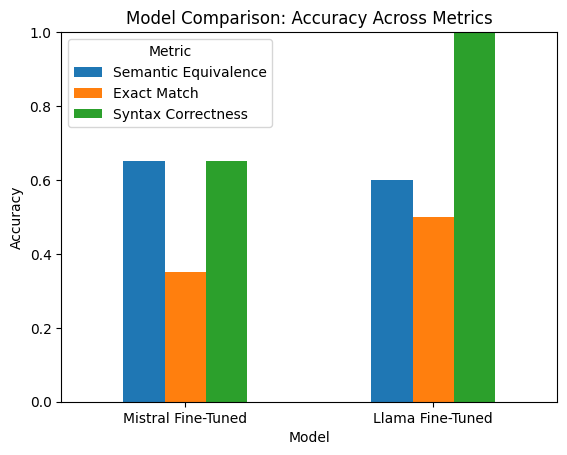

In [31]:

plt.figure(figsize=(10, 6))
accuracy_df.set_index("Model").plot(kind="bar", rot=0)
plt.title("Model Comparison: Accuracy Across Metrics")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.legend(title="Metric")
plt.show()





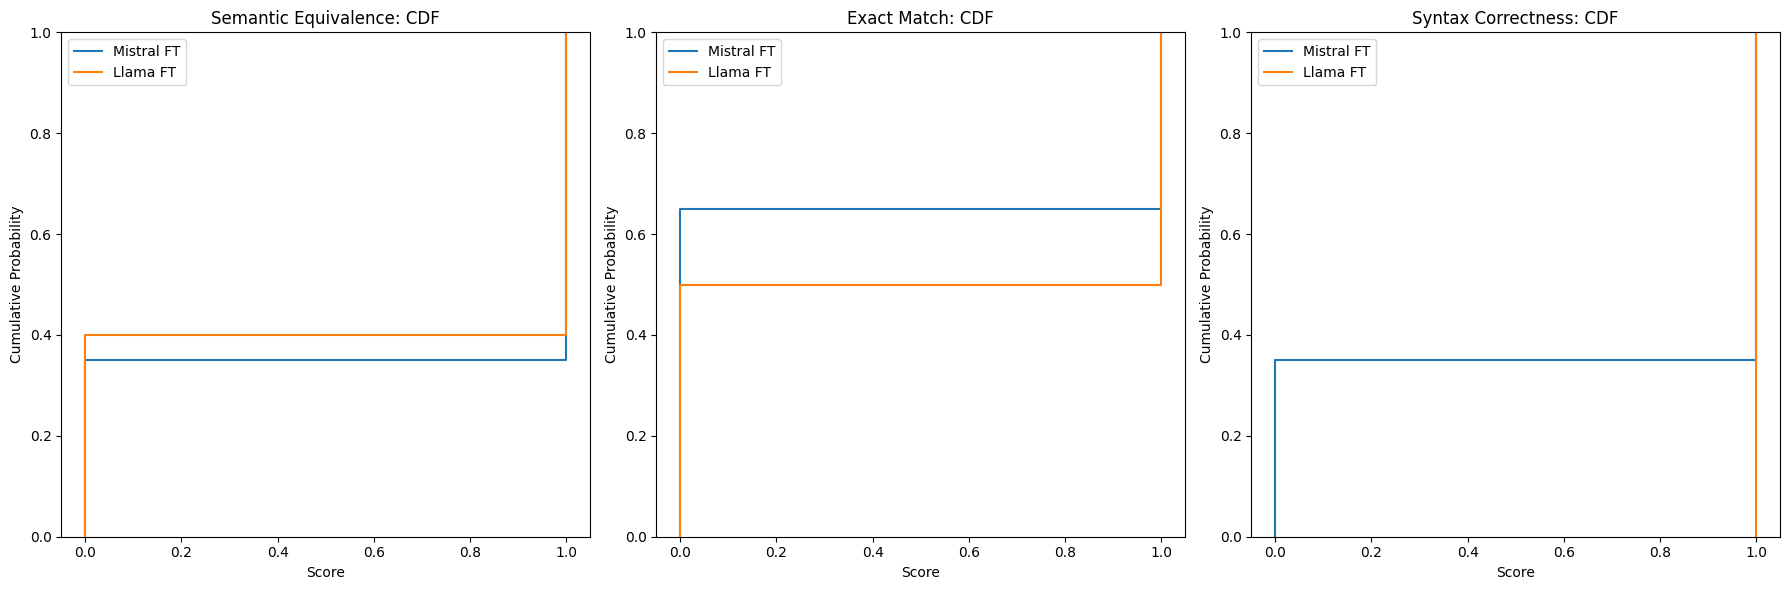

In [35]:
plt.figure(figsize=(18, 6))

# Semantic Equivalence
plt.subplot(1, 3, 1)
sns.ecdfplot(mistral_ft_df["semantic_equivalence"], label="Mistral FT")
sns.ecdfplot(llama_ft_df["semantic_equivalence"], label="Llama FT")
plt.xlabel("Score")
plt.ylabel("Cumulative Probability")
plt.title("Semantic Equivalence: CDF")
plt.legend()

# Exact Match
plt.subplot(1, 3, 2)
sns.ecdfplot(mistral_ft_df["exact_match"], label="Mistral FT")
sns.ecdfplot(llama_ft_df["exact_match"], label="Llama FT")
plt.xlabel("Score")
plt.ylabel("Cumulative Probability")
plt.title("Exact Match: CDF")
plt.legend()

# Syntax Correctness
plt.subplot(1, 3, 3)
sns.ecdfplot(mistral_ft_df["syntax_correctness"], label="Mistral FT")
sns.ecdfplot(llama_ft_df["syntax_correctness"], label="Llama FT")
plt.xlabel("Score")
plt.ylabel("Cumulative Probability")
plt.title("Syntax Correctness: CDF")
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
import pandas as pd
validation_data = pd.read_csv("/content/drive/MyDrive/Tanmay-validation-data/validation_data.csv")
validation_data.head()


,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation,text
0,1,artificial intelligence,"AI data on algorithmic fairness, AI safety, ex...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the average explainability score of cr...,"CREATE TABLE creative_ai (application_id INT, ...",SELECT AVG(explainability_score) FROM creative...,This SQL query calculates the average explaina...,"Below is an instruction that describes a task,..."
1,2,rural development,"Agricultural innovation metrics, rural infrast...",basic SQL,basic SQL with a simple select statement,data manipulation,"inserting, updating, or deleting records",Delete all records of rural infrastructure pro...,"CREATE TABLE rural_infrastructure (id INT, pro...",DELETE FROM rural_infrastructure WHERE country...,This SQL query deletes all records of rural in...,"Below is an instruction that describes a task,..."
2,3,aerospace,"Aircraft manufacturing data, satellite deploym...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",How many accidents have been recorded for Spac...,"CREATE TABLE Accidents (id INT, launch_provide...","SELECT launch_provider, COUNT(*) FROM Accident...",This query groups the Accidents table by the l...,"Below is an instruction that describes a task,..."
3,4,aquaculture,"Aquatic farming data, fish stock management, o...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the maximum quantity of seafood sold i...,"CREATE TABLE sales (id INT, location VARCHAR(2...",SELECT MAX(quantity) FROM sales;,Find the maximum quantity of seafood sold in a...,"Below is an instruction that describes a task,..."
4,5,entertainment industry,"Audience demographics, viewership trends, cont...",basic SQL,basic SQL with a simple select statement,analytics and reporting,"generating reports, dashboards, and analytical...",What is the total budget for movies released b...,"CREATE TABLE Movies_Release_Year (id INT, titl...",SELECT SUM(budget) FROM Movies_Release_Year WH...,This query calculates the total budget for mov...,"Below is an instruction that describes a task,..."


In [41]:
validation_data.columns

Index(['id', 'domain', 'domain_description', 'sql_complexity',
       'sql_complexity_description', 'sql_task_type',
       'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql',
       'sql_explanation', 'text'],
      dtype='object')

In [42]:
mistral_ft_df['domain'] = validation_data['domain'].iloc[:20]
llama_ft_df['domain'] = validation_data['domain'].iloc[:20]

In [44]:
mistral_ft_df['sql_complexity'] = validation_data['sql_complexity'].iloc[:20]
llama_ft_df['sql_complexity'] = validation_data['sql_complexity'].iloc[:20]

In [46]:
mistral_ft_df.head()

,semantic_equivalence,exact_match,syntax_correctness,domain,sql_complexity
0,1,1,1,artificial intelligence,basic SQL
1,1,1,1,rural development,basic SQL
2,0,0,0,aerospace,aggregation
3,1,1,1,aquaculture,basic SQL
4,1,1,1,entertainment industry,basic SQL


In [49]:
mistral_ft_df['sql_complexity'].head(20)

,sql_complexity
0,basic SQL
1,basic SQL
2,aggregation
3,basic SQL
4,basic SQL
5,basic SQL
6,aggregation
7,basic SQL
8,basic SQL
9,basic SQL


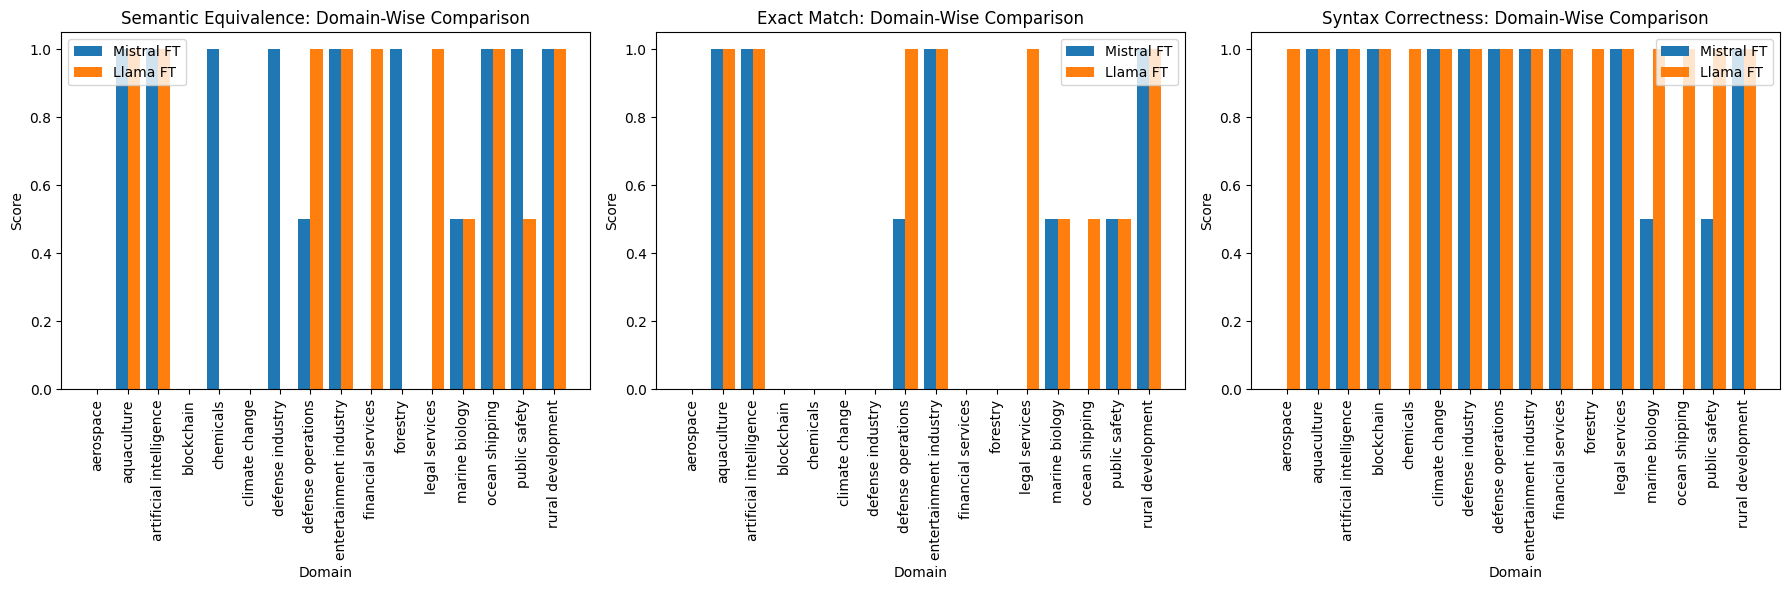

In [51]:
# Group by domain and calculate mean scores (only numeric columns)
mistral_domain_scores = mistral_ft_df.groupby("domain")[["semantic_equivalence", "exact_match", "syntax_correctness"]].mean().reset_index()
llama_domain_scores = llama_ft_df.groupby("domain")[["semantic_equivalence", "exact_match", "syntax_correctness"]].mean().reset_index()

# Plot domain-wise comparison
plt.figure(figsize=(18, 6))

# Semantic Equivalence
plt.subplot(1, 3, 1)
x = np.arange(len(mistral_domain_scores))
plt.bar(x - 0.2, mistral_domain_scores["semantic_equivalence"], width=0.4, label="Mistral FT")
plt.bar(x + 0.2, llama_domain_scores["semantic_equivalence"], width=0.4, label="Llama FT")
plt.xticks(x, mistral_domain_scores["domain"], rotation=90)
plt.xlabel("Domain")
plt.ylabel("Score")
plt.title("Semantic Equivalence: Domain-Wise Comparison")
plt.legend()

# Exact Match
plt.subplot(1, 3, 2)
plt.bar(x - 0.2, mistral_domain_scores["exact_match"], width=0.4, label="Mistral FT")
plt.bar(x + 0.2, llama_domain_scores["exact_match"], width=0.4, label="Llama FT")
plt.xticks(x, mistral_domain_scores["domain"], rotation=90)
plt.xlabel("Domain")
plt.ylabel("Score")
plt.title("Exact Match: Domain-Wise Comparison")
plt.legend()

# Syntax Correctness
plt.subplot(1, 3, 3)
plt.bar(x - 0.2, mistral_domain_scores["syntax_correctness"], width=0.4, label="Mistral FT")
plt.bar(x + 0.2, llama_domain_scores["syntax_correctness"], width=0.4, label="Llama FT")
plt.xticks(x, mistral_domain_scores["domain"], rotation=90)
plt.xlabel("Domain")
plt.ylabel("Score")
plt.title("Syntax Correctness: Domain-Wise Comparison")
plt.legend()

plt.tight_layout()
plt.show()

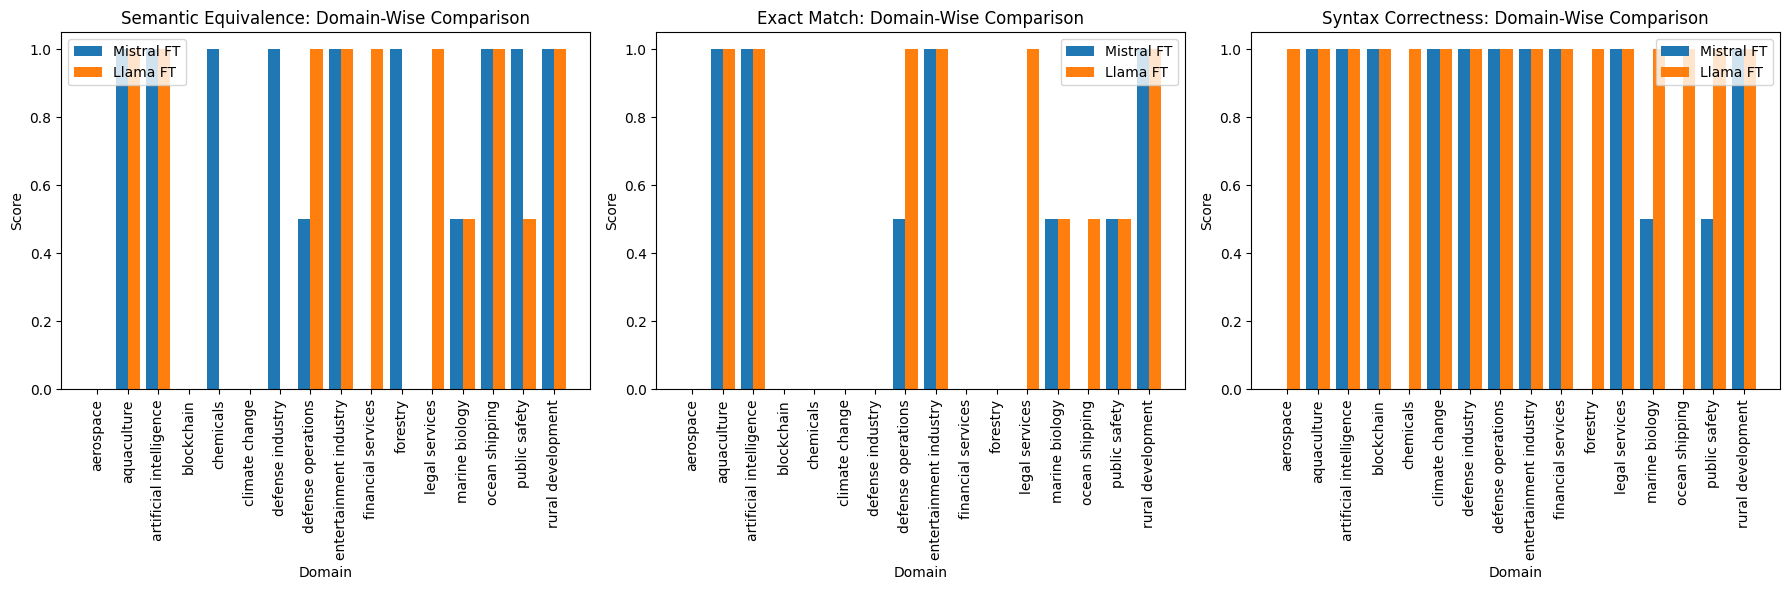

In [52]:
# Group by domain and calculate mean scores (only numeric columns)
mistral_domain_scores = mistral_ft_df.groupby("domain")[["semantic_equivalence", "exact_match", "syntax_correctness"]].mean().reset_index()
llama_domain_scores = llama_ft_df.groupby("domain")[["semantic_equivalence", "exact_match", "syntax_correctness"]].mean().reset_index()

# Plot domain-wise comparison
plt.figure(figsize=(18, 6))

# Semantic Equivalence
plt.subplot(1, 3, 1)
x = np.arange(len(mistral_domain_scores))
plt.bar(x - 0.2, mistral_domain_scores["semantic_equivalence"], width=0.4, label="Mistral FT")
plt.bar(x + 0.2, llama_domain_scores["semantic_equivalence"], width=0.4, label="Llama FT")
plt.xticks(x, mistral_domain_scores["domain"], rotation=90)
plt.xlabel("Domain")
plt.ylabel("Score")
plt.title("Semantic Equivalence: Domain-Wise Comparison")
plt.legend()

# Exact Match
plt.subplot(1, 3, 2)
plt.bar(x - 0.2, mistral_domain_scores["exact_match"], width=0.4, label="Mistral FT")
plt.bar(x + 0.2, llama_domain_scores["exact_match"], width=0.4, label="Llama FT")
plt.xticks(x, mistral_domain_scores["domain"], rotation=90)
plt.xlabel("Domain")
plt.ylabel("Score")
plt.title("Exact Match: Domain-Wise Comparison")
plt.legend()

# Syntax Correctness
plt.subplot(1, 3, 3)
plt.bar(x - 0.2, mistral_domain_scores["syntax_correctness"], width=0.4, label="Mistral FT")
plt.bar(x + 0.2, llama_domain_scores["syntax_correctness"], width=0.4, label="Llama FT")
plt.xticks(x, mistral_domain_scores["domain"], rotation=90)
plt.xlabel("Domain")
plt.ylabel("Score")
plt.title("Syntax Correctness: Domain-Wise Comparison")
plt.legend()

plt.tight_layout()
plt.show()

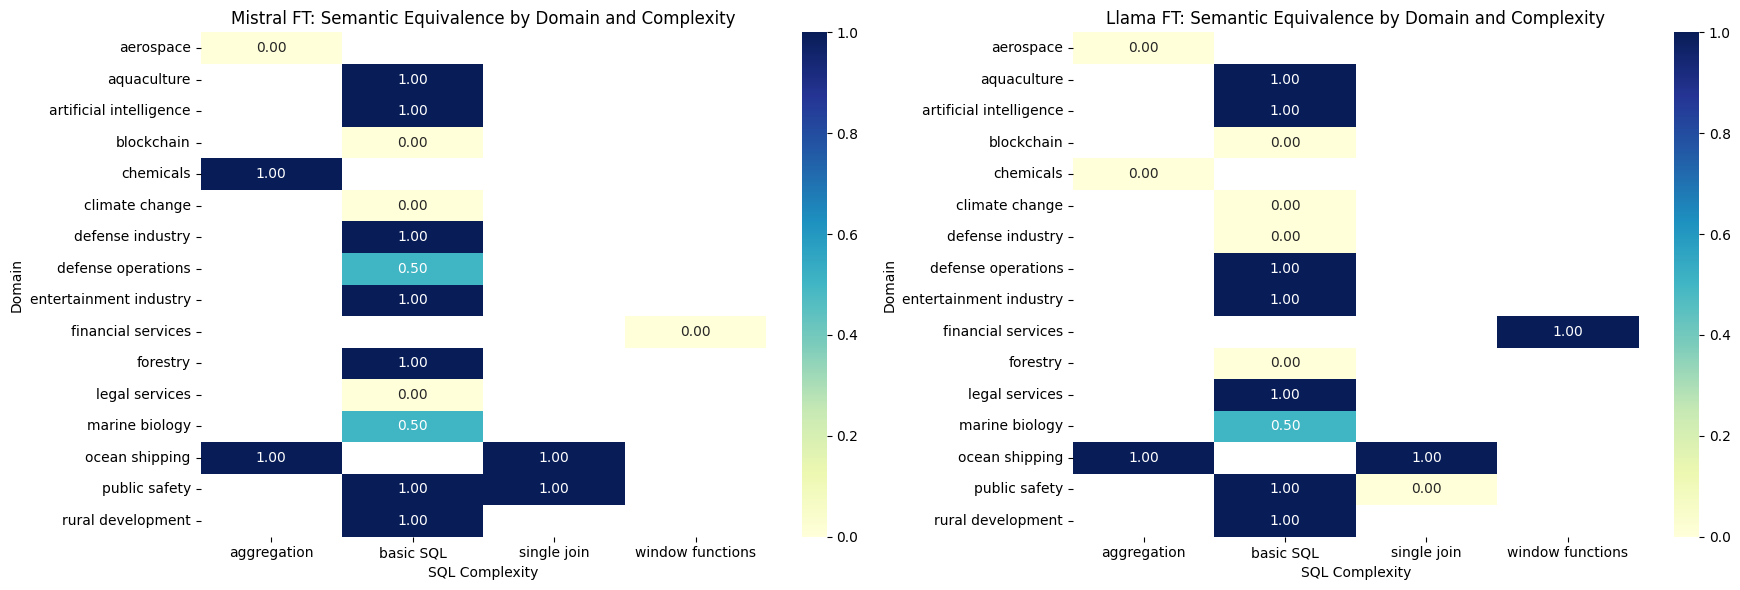

In [53]:
# Pivot the data for heatmap (only numeric columns)
mistral_heatmap_data = mistral_ft_df.pivot_table(index="domain", columns="sql_complexity", values="semantic_equivalence", aggfunc="mean")
llama_heatmap_data = llama_ft_df.pivot_table(index="domain", columns="sql_complexity", values="semantic_equivalence", aggfunc="mean")

# Plot heatmaps
plt.figure(figsize=(18, 6))

# Mistral FT
plt.subplot(1, 2, 1)
sns.heatmap(mistral_heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mistral FT: Semantic Equivalence by Domain and Complexity")
plt.xlabel("SQL Complexity")
plt.ylabel("Domain")

# Llama FT
plt.subplot(1, 2, 2)
sns.heatmap(llama_heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Llama FT: Semantic Equivalence by Domain and Complexity")
plt.xlabel("SQL Complexity")
plt.ylabel("Domain")

plt.tight_layout()
plt.show()